## Tips for Linear Regression
### A. Feature Scaling


When features have vastly different scales (e.g., house size in feet² from 300-2000 vs. number of bedrooms from 1-5), gradient descent can be very slow. The cost function surface becomes elongated, and the algorithm takes an inefficient, zig-zag path to the minimum.

**Feature scaling** transforms the features to be on a similar scale, making the cost function's contours more circular and allowing gradient descent to converge much more quickly.

Common techniques:
1.  **Mean Normalization:** `x_j = (x_j - μ_j) / (max_j - min_j)`
2.  **Z-score Normalization:** `x_j = (x_j - μ_j) / σ_j` (where μ is the mean and σ is the standard deviation)

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$.

A good rule of thumb is to get features into an approximate range of -1 to 1.

In [1]:
import numpy as np
def zscore_normalize_features(X):
    """
    Computes X, z-score normalized by column
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

# Sample data with different scales
X_train = np.array([[2104, 5], [1416, 3], [852, 2]])
y_train = np.array([460, 232, 178])

print("Original features:\n", X_train)

# Normalize the features
X_norm, mu, sigma = zscore_normalize_features(X_train)

print("\nNormalized features:\n", X_norm)

Original features:
 [[2104    5]
 [1416    3]
 [ 852    2]]

Normalized features:
 [[ 1.26311506  1.33630621]
 [-0.08073519 -0.26726124]
 [-1.18237987 -1.06904497]]


### B. Checking for Convergence & Choosing the Learning Rate (α)

To ensure gradient descent is working correctly, we can plot a **learning curve**, which is the cost J as a function of the number of iterations. 

- If J is **increasing**, your learning rate `α` is too large.
- If J is **decreasing very slowly**, `α` might be too small.
- If J decreases and then flattens out, the algorithm has likely **converged**.

A good strategy for choosing `α` is to try a range of values, increasing by a factor of roughly 3 each time (e.g., 0.001, 0.003, 0.01, 0.03, 0.1, ...). Pick the value that causes the cost to decrease quickly and consistently.

In [6]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for multiple linear regression.
    """
    m = X.shape[0]
    predictions = X.dot(w) + b
    cost = np.sum((predictions - y) ** 2)
    total_cost = (1 / (2 * m)) * cost
    return total_cost

def compute_gradient(X, y, w, b):
    """
    Computes the gradients for w and b.
    """
    m, n = X.shape
    
    # Calculate the error
    err = (X.dot(w) + b) - y
    
    # Calculate gradients
    dj_dw = (1/m) * X.T.dot(err)
    dj_db = (1/m) * np.sum(err)
    
    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs gradient descent to learn w and b.
    """
    w = w_in.copy() # Avoid modifying global w
    b = b_in
    J_history = []
    
    for i in range(num_iters):
        # Calculate the gradient
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost at each iteration
        J_history.append(compute_cost(X, y, w, b))
        
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
            
    return w, b, J_history

Iteration    0: Cost 38975.90
Iteration  100: Cost   293.80
Iteration  200: Cost   246.21
Iteration  300: Cost   206.32
Iteration  400: Cost   172.90
Iteration  500: Cost   144.89
Iteration  600: Cost   121.42
Iteration  700: Cost   101.75
Iteration  800: Cost    85.27
Iteration  900: Cost    71.46

Final parameters found: w=[-57.21270838 176.7815735 ], b=290.00


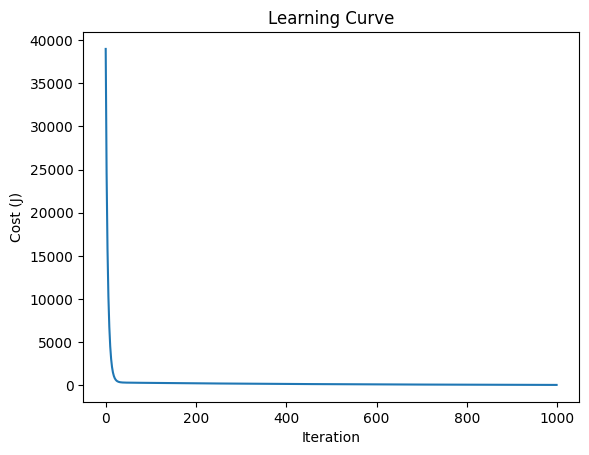

In [7]:
import matplotlib.pyplot as plt

# --- Run Gradient Descent on Normalized Data ---

# Initialize parameters
w_initial = np.zeros(X_norm.shape[1])
b_initial = 0.

# Settings
iterations = 1000
alpha = 0.1 # A good learning rate for this data

w_final, b_final, J_history = gradient_descent(X_norm, y_train, w_initial, b_initial, alpha, iterations)

print(f"\nFinal parameters found: w={w_final}, b={b_final:.2f}")

# Plotting the learning curve
plt.plot(np.arange(len(J_history)), J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost (J)")
plt.title("Learning Curve")
plt.show()

### C. Feature Engineering & Polynomial Regression

Sometimes, the original features aren't sufficient to capture the underlying patterns in the data. **Feature engineering** is the art of creating new, more informative features using intuition and domain knowledge. For example, if you have `frontage` and `depth` of a property, you could create a new feature `area = frontage * depth`.

**Polynomial Regression** is a powerful form of feature engineering that allows a linear model to fit non-linear data. You can create new features by taking existing features to higher powers (e.g., x², x³, √x).

For example, to fit a cubic curve to your data, you could change your model to:
f_w,b(x) = w₁x + w₂x² + w₃x³ + b

Even though the function is a curve, it is still a *linear regression* problem because we are solving for the parameters w₁, w₂, w₃, and b, and the model is linear in these parameters.

**Important:** If you use polynomial features, feature scaling becomes essential due to the large differences in scale (e.g., x might be 1000, but x³ would be 1,000,000,000).

Iteration    0: Cost     0.16
Iteration  100: Cost     0.04
Iteration  200: Cost     0.04
Iteration  300: Cost     0.04
Iteration  400: Cost     0.04
Iteration  500: Cost     0.04
Iteration  600: Cost     0.04
Iteration  700: Cost     0.04
Iteration  800: Cost     0.04
Iteration  900: Cost     0.03


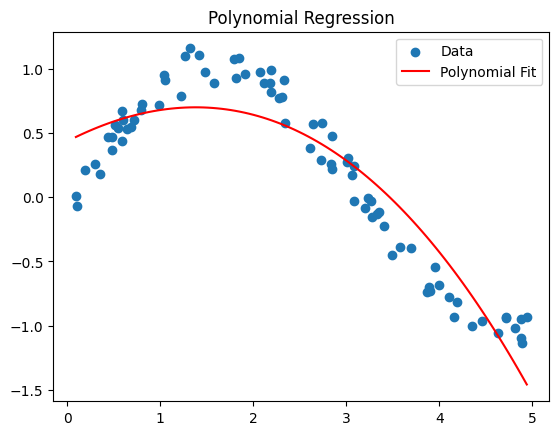

In [8]:
# Generate some non-linear data
np.random.seed(0)
x_poly = np.sort(5 * np.random.rand(80, 1), axis=0)
y_poly = np.sin(x_poly).ravel() + np.random.randn(80) * 0.1

# --- 1. Create Polynomial Features ---
# We'll add x^2 and x^3 as new features
X_poly_features = np.c_[x_poly, x_poly**2, x_poly**3]

# --- 2. Scale the Features ---
X_poly_norm, mu_poly, sigma_poly = zscore_normalize_features(X_poly_features)

# --- 3. Run Gradient Descent ---
w_poly_initial = np.zeros(X_poly_norm.shape[1])
b_poly_initial = 0.
w_poly, b_poly, _ = gradient_descent(X_poly_norm, y_poly, w_poly_initial, b_poly_initial, 0.1, 1000)

# --- 4. Plot the Results ---
plt.scatter(x_poly, y_poly, label='Data')

# Create a set of points to plot the model's prediction
x_range = np.linspace(x_poly.min(), x_poly.max(), 100).reshape(-1, 1)
X_range_features = np.c_[x_range, x_range**2, x_range**3]

# Don't forget to normalize the range using the *same* mu and sigma from training
X_range_norm = (X_range_features - mu_poly) / sigma_poly
y_pred = X_range_norm.dot(w_poly) + b_poly

plt.plot(x_range, y_pred, color='red', label='Polynomial Fit')
plt.title("Polynomial Regression")
plt.legend()
plt.show()